In [28]:
# Importing required libraries
import pandas as pd # For data manipulation
import os # To interact with the operating system, list files, navigate directories, etc.
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For advanced visualizations

# Step 1: Load the dataset from a URL
url="https://learn.walsoftcomputers.com/csv/bi.csv" # Replace with your Kaggle URL if needed
data=pd.read_csv(url,encoding='ISO-8859-1') # ISO encoding handles special characters

In [29]:
# Step 2: View the first few rows of the dataset
# Shows first 5 rows by default
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [32]:
# Step 3: View the last few rows of the dataset
# Shows last 5 rows
data.tail()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74
76,Mohammed,Salim,31,Male,Somali,Sognsvann,35,Masters,144,72.0,90


In [33]:
# Step 4: Get summary information about the dataset
# Displays number of rows, columns, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [34]:
# Step 5: Get statistical summary of numeric columns
# Shows mean, std, min, max, quartiles, etc.
data.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [35]:
# Step 6: Check data types of each column
# Shows column names and their data types
data.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

In [36]:
# Step 7: Check shape of the dataset
# Returns (number of rows, number of columns)
data.shape

(77, 11)

In [37]:
# Step 8: Check for missing values
data.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [38]:
# Step 9: Clean data by dropping rows with missing values
data.dropna(inplace=True)
data_clean=data

In [40]:
#info after dropping the nan values
data.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

In [39]:
# Step 10: Check for duplicate rows
data.duplicated().sum()

0

In [41]:
# Step 11: Gets all the columns present in the dataframe
data.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [44]:
# Step 12: Separate numeric columns
numeric_cols = data_clean.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']


<Figure size 1200x600 with 0 Axes>

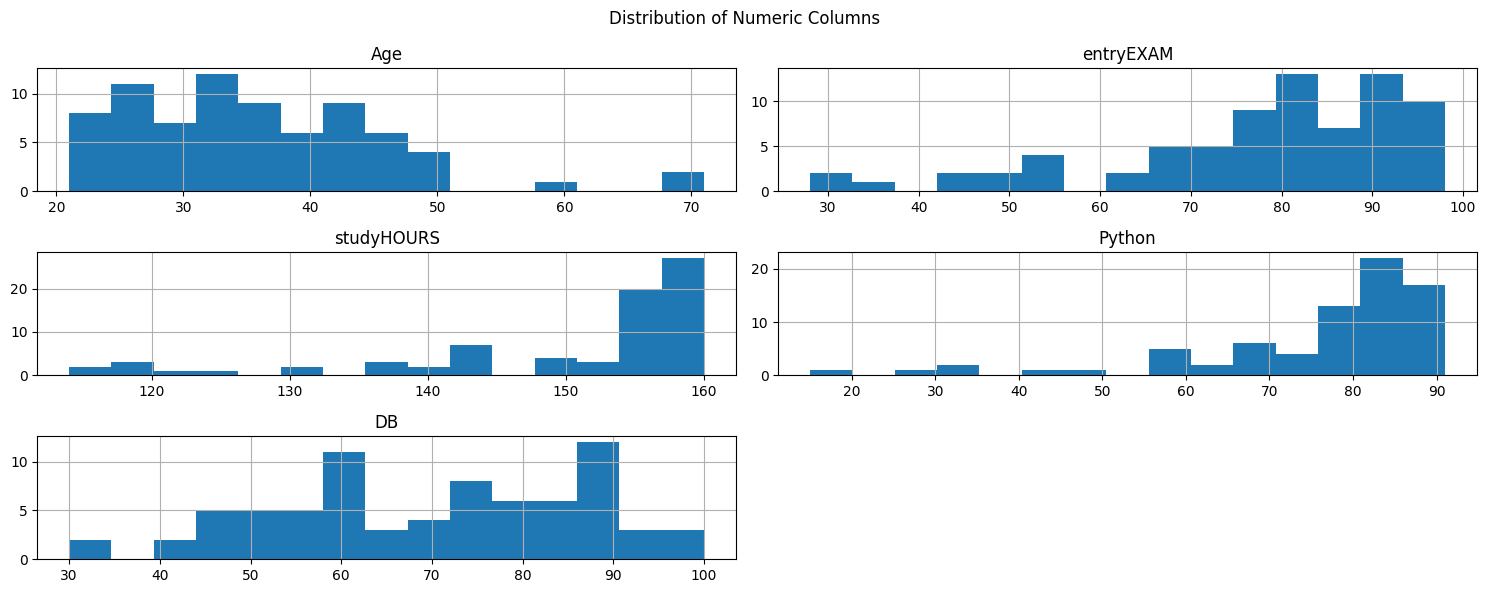

In [42]:
# Step 13: Plot histograms for numeric columns to see distribution
plt.figure(figsize=(12,6))
data_clean[numeric_cols].hist(bins=15, figsize=(15,6))
plt.suptitle("Distribution of Numeric Columns")
plt.tight_layout()
plt.show()

In [43]:
# Step 14: Separate categorical columns
categorical_cols=data_clean.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['fNAME', 'lNAME', 'gender', 'country', 'residence', 'prevEducation']


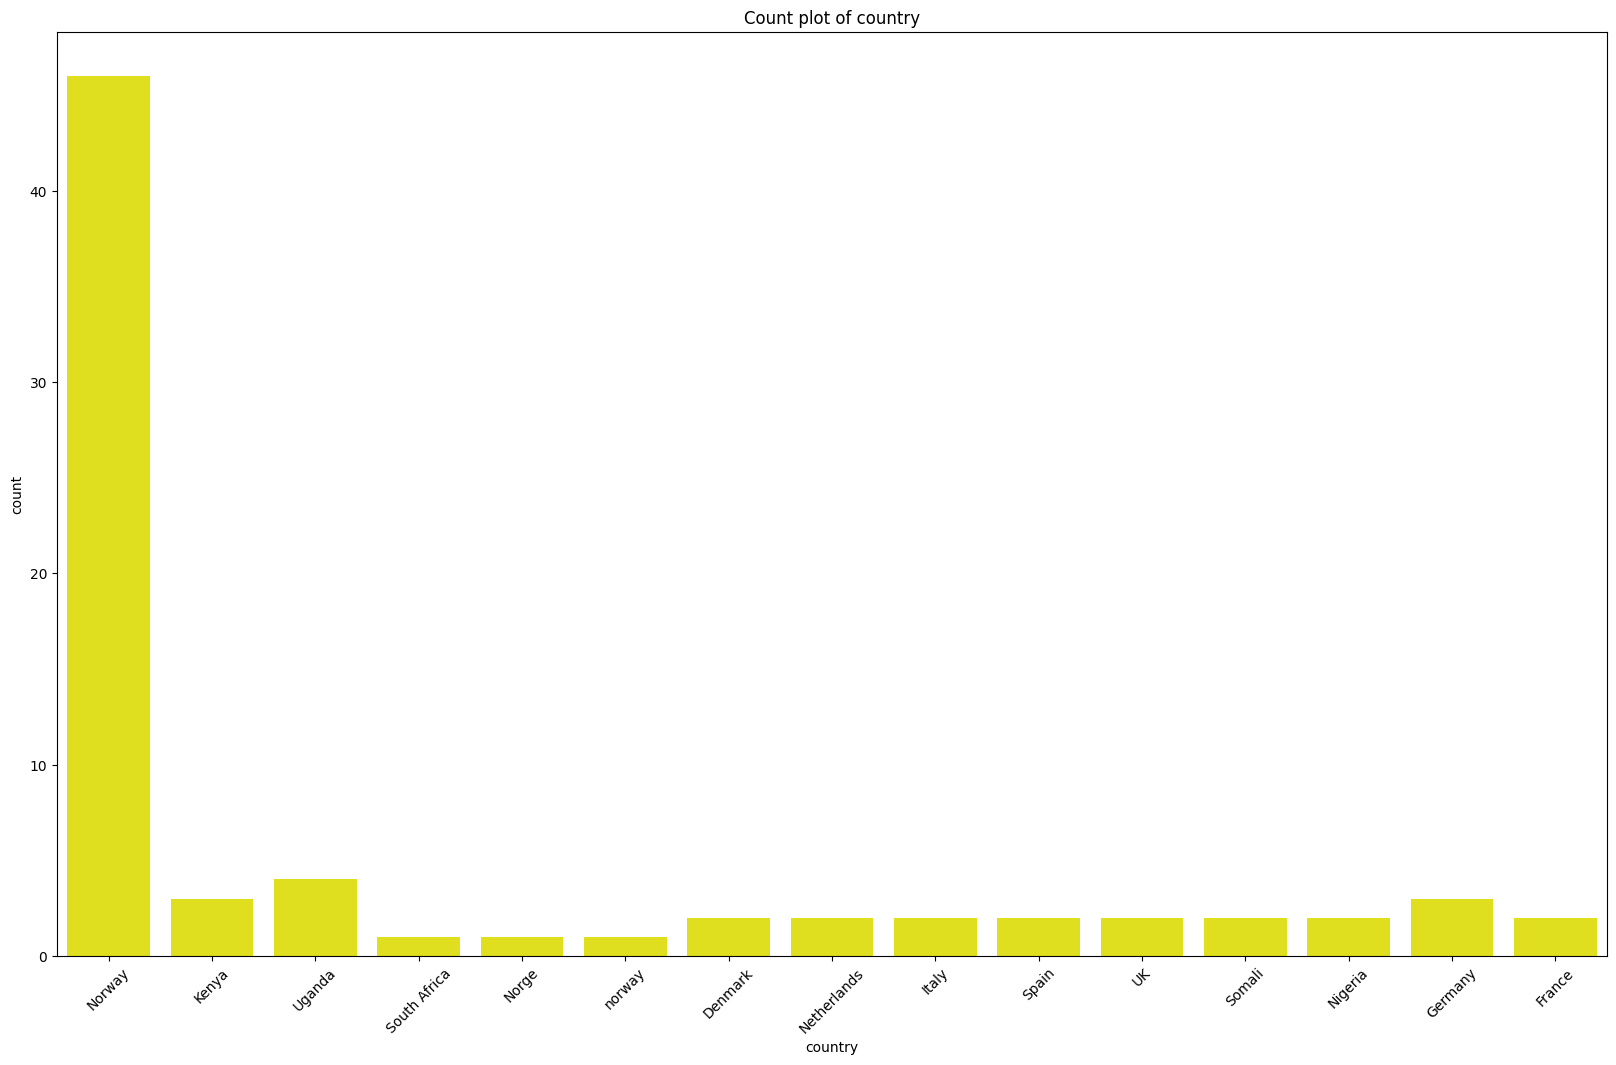

In [46]:
# Step 15: Plot countplots for each categorical column
plt.figure(figsize=(20,12))
sns.countplot(data=data_clean,x='country',color='yellow')
plt.title(f"Count plot of country")
plt.xticks(rotation=45)
plt.show()

In [47]:
# Step 16: Compute correlation between numeric columns
corr=data_clean[numeric_cols].corr()
corr

,Age,entryEXAM,studyHOURS,Python,DB
Age,1.000000,0.089493,0.188099,-0.014608,0.076902
entryEXAM,0.089493,1.000000,0.796708,0.787550,0.594018
studyHOURS,0.188099,0.796708,1.000000,0.813826,0.442339
Python,-0.014608,0.787550,0.813826,1.000000,0.449401
DB,0.076902,0.594018,0.442339,0.449401,1.000000


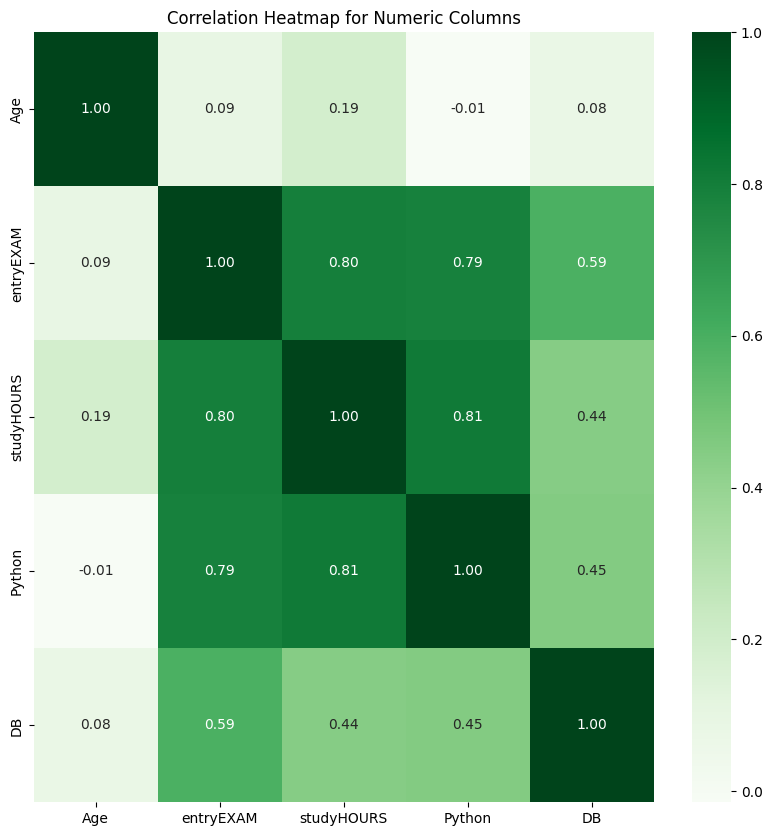

In [48]:
# Step 17: Plot correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()